# Import the required Libraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

# 1. Load the Data Set

In [42]:
df_pd = pd.read_csv("parkinsons.data")
df_pd.shape

(195, 24)

# 2. Analyse the Data

*** Check for missing values, counts and data type ***

In [43]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [44]:
df_pd.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# 3. EDA on the Data

In [45]:
df_pd.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


*** 3.1 Measures of Central Tendency ***

In [55]:
df_pd.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


*** 3.1 Univariate Analysis ***

In [31]:
df_pd['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

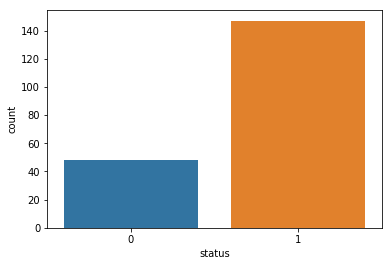

In [32]:
sns.countplot(df_pd.status)

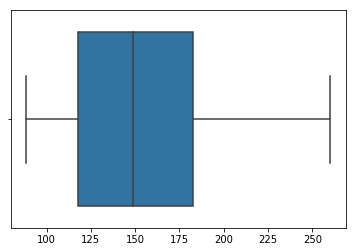

In [63]:
sns.boxplot(x=['MDVP:Fo(Hz)'], data=df_pd)

1 MDVP:Fo(Hz)
2 MDVP:Fhi(Hz)
3 MDVP:Flo(Hz)
4 MDVP:Jitter(%)
5 MDVP:Jitter(Abs)
6 MDVP:RAP
7 MDVP:PPQ
8 Jitter:DDP
9 MDVP:Shimmer
10 MDVP:Shimmer(dB)
11 Shimmer:APQ3
12 Shimmer:APQ5
13 MDVP:APQ
14 Shimmer:DDA
15 NHR
16 HNR
17 status
18 RPDE
19 DFA
20 spread1
21 spread2
22 D2


IndexError: invalid index

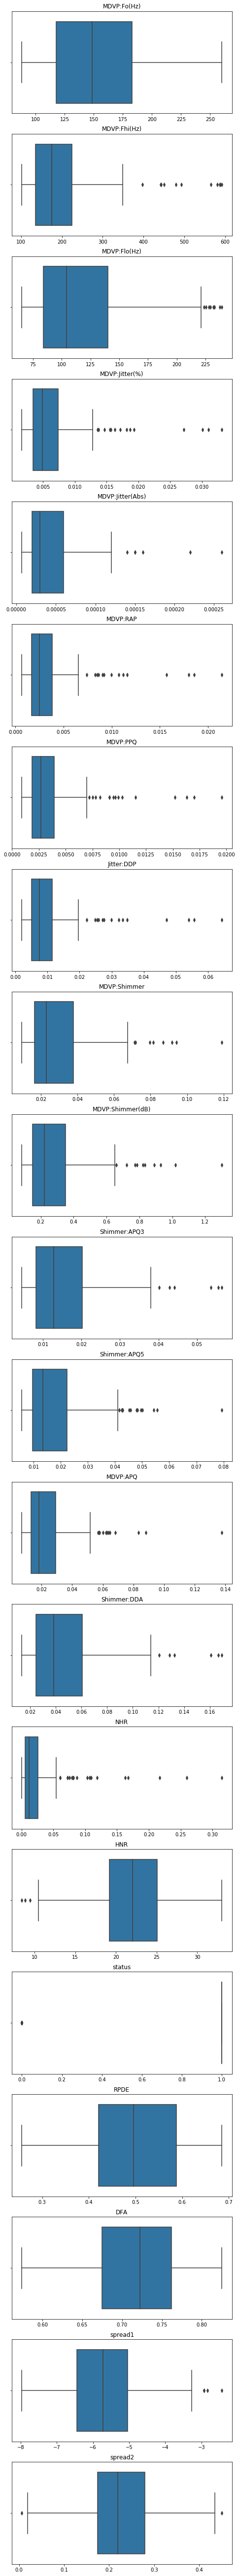

In [78]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(22,1)
plt.figure(figsize=(8,25*4))
for i in range(1,df_pd.columns.size):
    print(i,df_pd.columns[i])
    ax1 = plt.subplot(gs[i])
    sns.boxplot(x=[df_pd.columns[i]], data = df_pd)
    #sns.distplot(df[col][df['Personal Loan'] == 0], bins=50, color='b')
    ax1.set_xlabel('')
    ax1.set_title(df_pd.columns[i])
plt.show()

*** Parkinsons ratio by Vocal Fundamental Frequency ***

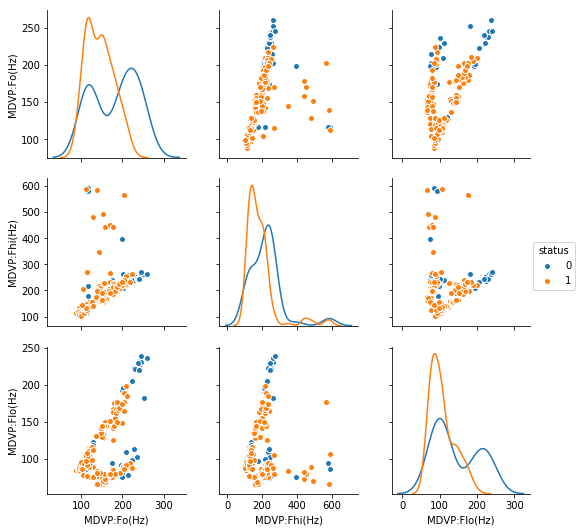

In [20]:
sns.pairplot(df_pd, vars = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'], diag_kind='kde', hue='status')

*** Variations in Fundamental Frequency ***

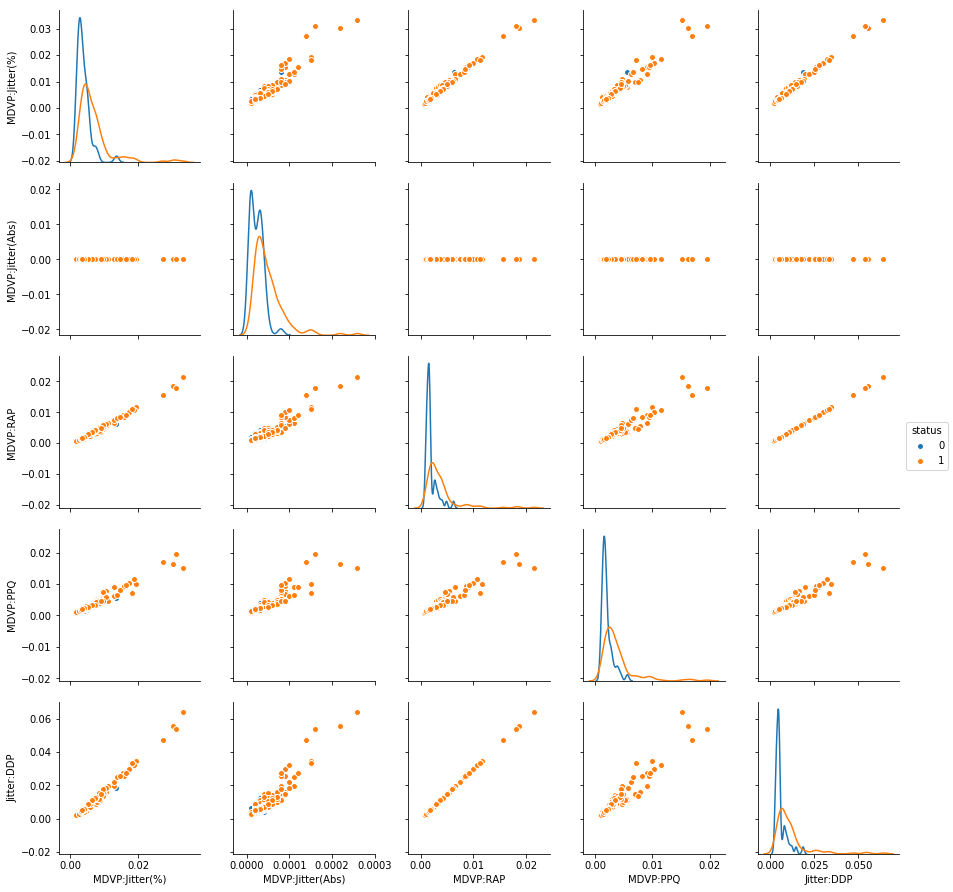

In [22]:
sns.pairplot(df_pd, vars = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'], diag_kind='kde', hue='status')

*** Variations in Amplitude ***

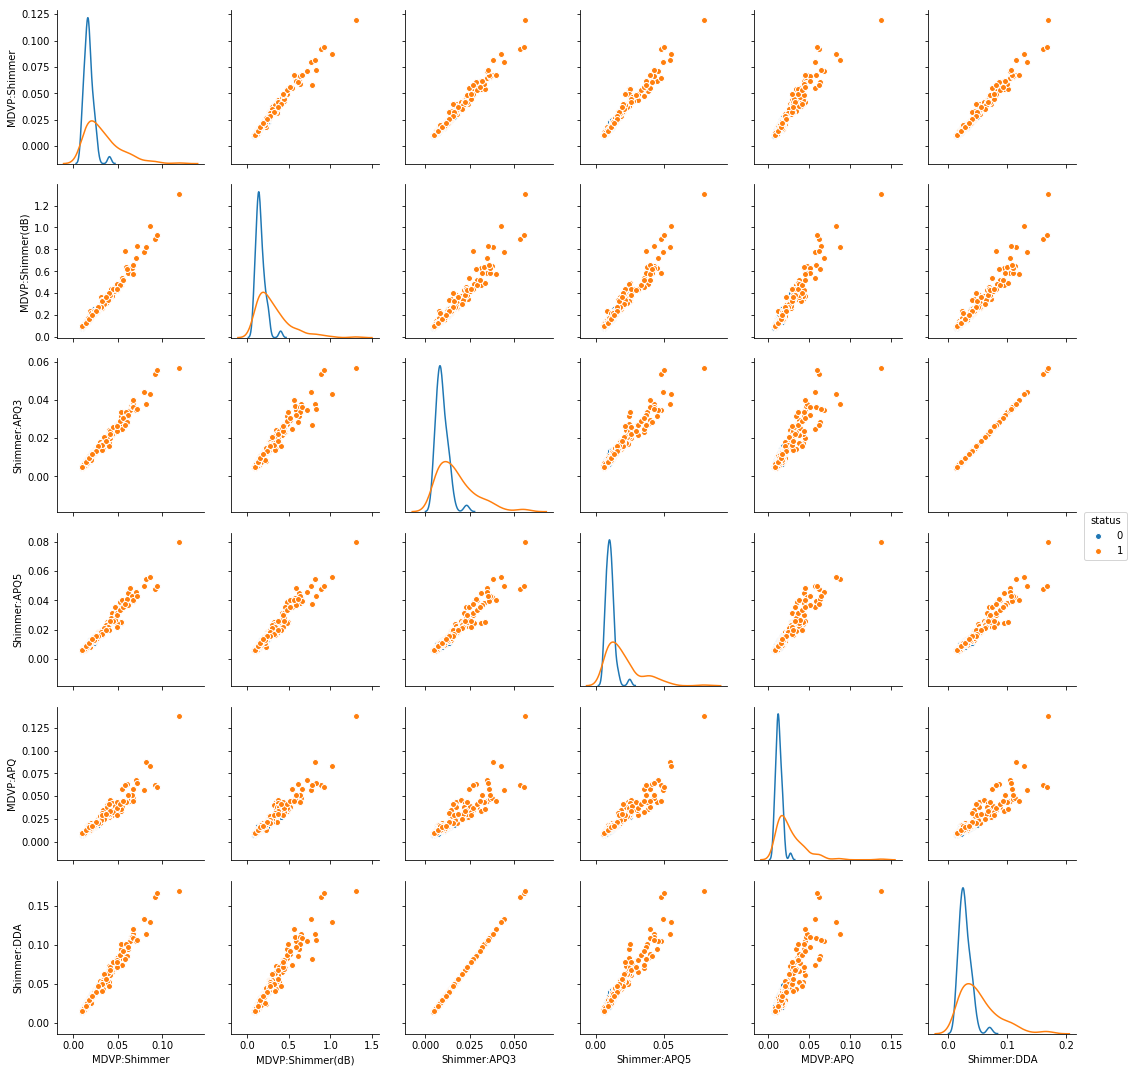

In [23]:
sns.pairplot(df_pd, vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'], diag_kind='kde', hue='status')

*** Measures of Ratio of Noise ***

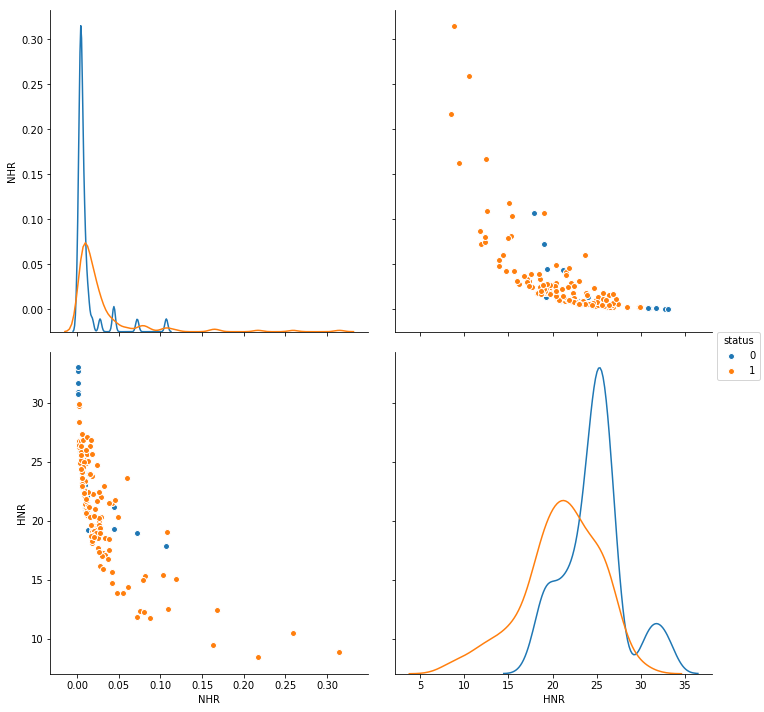

In [27]:
sns.pairplot(df_pd, vars = ['NHR','HNR'], diag_kind='kde', hue='status', size=5)

*** Nonlinear Dynamical Complexity measures ***

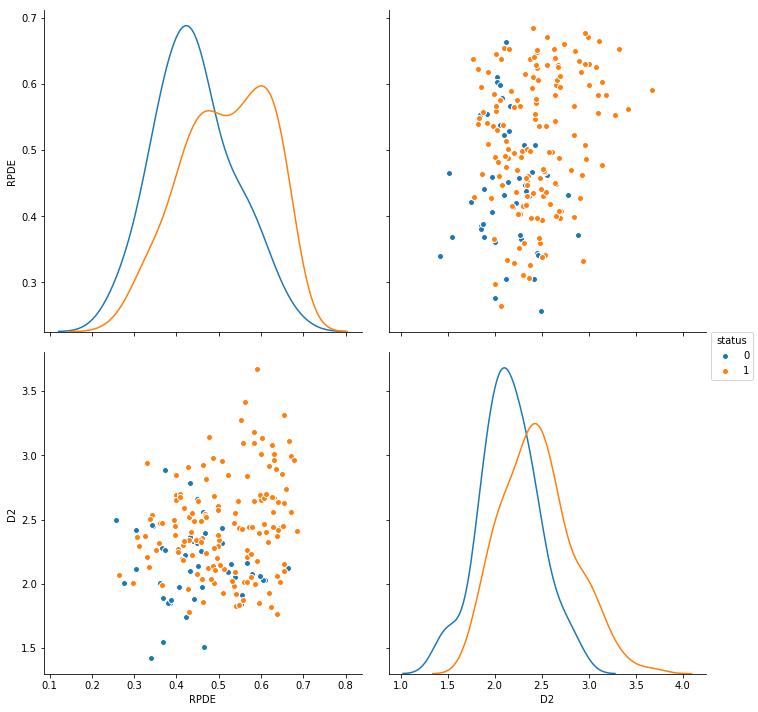

In [28]:
sns.pairplot(df_pd, vars = ['RPDE', 'D2'], diag_kind='kde', hue='status', size=5)

*** Three nonlinear measures of fundamental frequency variation ***

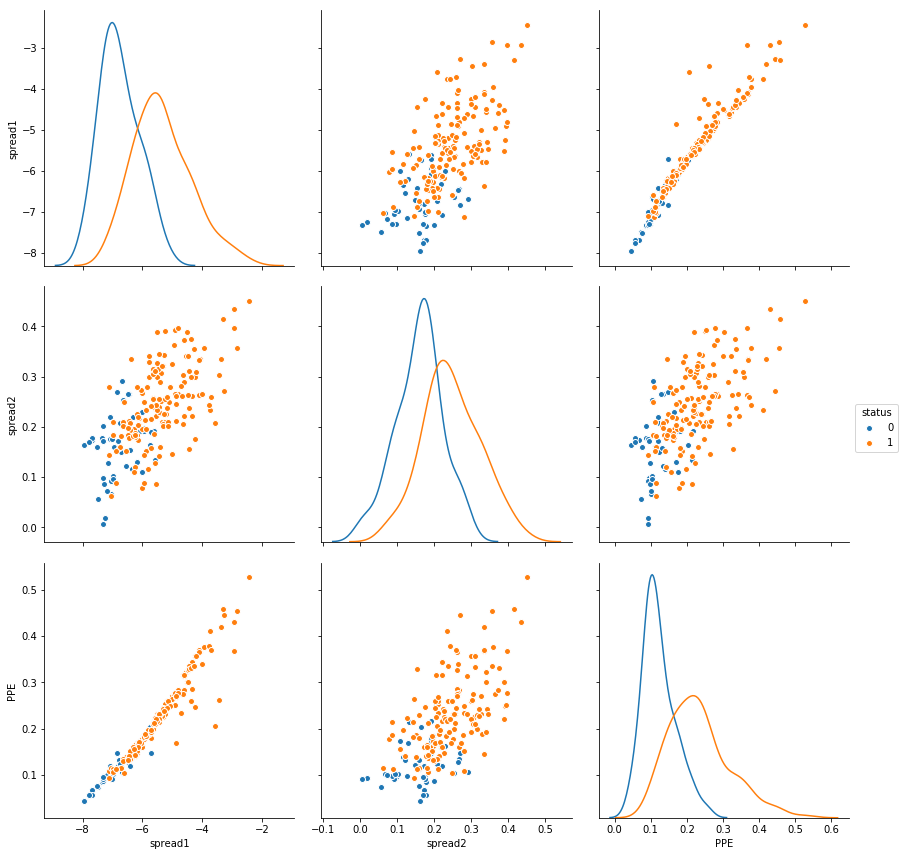

In [29]:
sns.pairplot(df_pd, vars = ['spread1', 'spread2', 'PPE'], diag_kind='kde', hue='status', size=4)

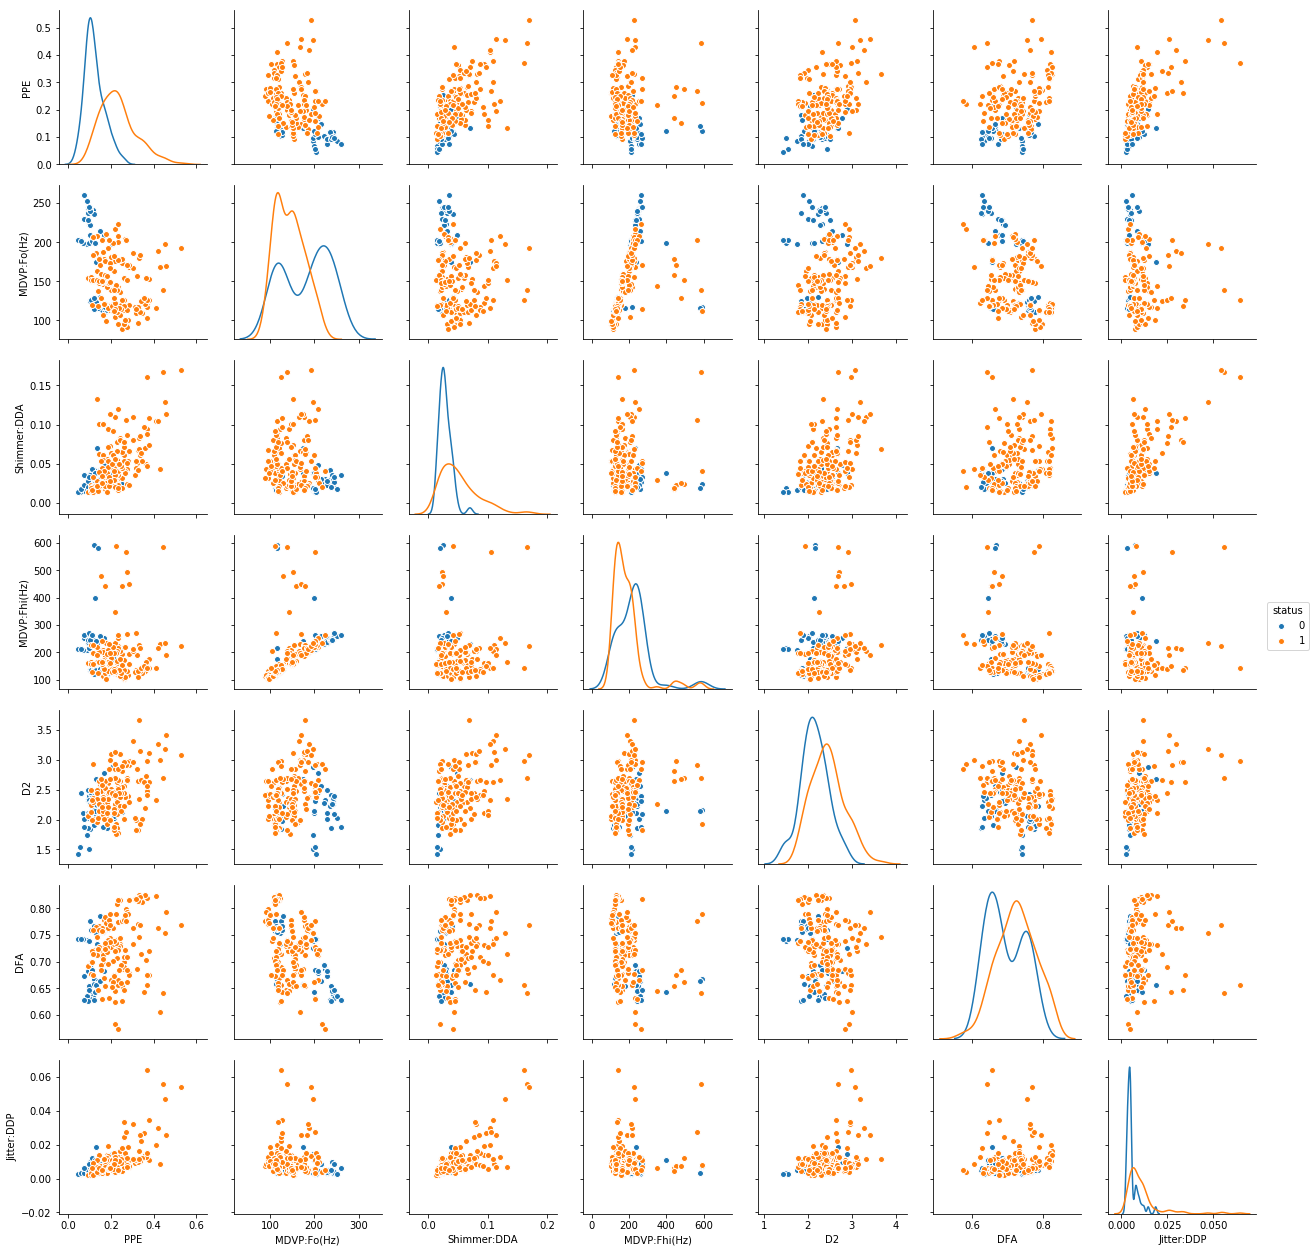

In [163]:
sns.pairplot(df_pd, vars = ['PPE','MDVP:Fo(Hz)', 'Shimmer:DDA', 'MDVP:Fhi(Hz)', 'D2', 'DFA', 'Jitter:DDP'], diag_kind='kde', hue='status')

# 4. Split the Data

In [150]:
X = df_pd.drop(labels=['name', 'status'], axis=1)
y = df_pd.status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 5. Ensemble Model Building (using Entropy)

In [151]:
#Using entropy without any specific depth
model_dtree = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [152]:
model_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [153]:
y_pred = model_dtree.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [170]:
print("Decission Tree - Score : ",model_dtree.score(X_test, y_test))

Decission Tree - Score :  0.864406779661017


In [173]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[12,  7],
       [ 1, 39]])

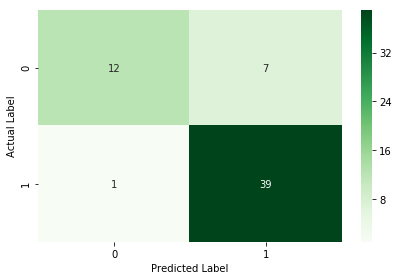

In [181]:
sns.heatmap(conf_matrix,cmap='Greens', annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()

In [192]:
print("========== Feature Importance ============= ")
print (pd.DataFrame(model_dtree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance', ascending=False))

========== Feature Importance ============= 
                  Importance
PPE                 0.387263
MDVP:Fo(Hz)         0.219150
Shimmer:DDA         0.106000
MDVP:Fhi(Hz)        0.099800
D2                  0.079409
DFA                 0.067644
Jitter:DDP          0.040734
MDVP:Flo(Hz)        0.000000
spread2             0.000000
spread1             0.000000
RPDE                0.000000
HNR                 0.000000
NHR                 0.000000
MDVP:APQ            0.000000
MDVP:Jitter(%)      0.000000
Shimmer:APQ3        0.000000
MDVP:Shimmer(dB)    0.000000
MDVP:Shimmer        0.000000
MDVP:PPQ            0.000000
MDVP:RAP            0.000000
MDVP:Jitter(Abs)    0.000000
Shimmer:APQ5        0.000000


*** Building the Tree ***

In [194]:
from IPython.display import Image
from sklearn import tree
from os import system

In [206]:
target_labels = np.unique(y.data)
target_labels = ['0','1']
parkinsons_tree = open('parkinsons_tree.dot','w')
dot_data = tree.export_graphviz(model_dtree,out_file=parkinsons_tree, feature_names=list(X_train.columns), class_names=list(target_labels))
parkinsons_tree.close()

*** Ensemble Learning - Bagging ***

In [132]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=model_dtree,max_samples=0.75, random_state=1)
bgcl = bgcl.fit(X_train, y_train)
y_bgcl_pred = bgcl.predict(X_test)
y_bgcl_score = bgcl.score(X_test, y_test)
y_bgcl_score
print("Bagging - Score : ",bgcl.score(X_test, y_test))

Bagging - Score :  0.864406779661017


*** Ensemble Learning - Adaptive Boosting ***

In [133]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=model_dtree,random_state=1)
abcl = abcl.fit(X_train, y_train)
y_abcl_pred = abcl.predict(X_test)
abcl_score = abcl.score(X_test,y_test)
print("Adaptive Boosting - Score : ",abcl_score)

Adaptive Boosting - Score :  0.847457627118644


*** Ensemble Learning - Gradient Boost Classifier ***

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)
y_gbcl_pred = gbcl.predict(X_test)
gbcl_score = gbcl.score(X_test, y_test)
print("Gradient Boosting - Score : ",gbcl_score)

Gradient Boosting - Score :  0.864406779661017


# 7. Regularization of the Model

In [226]:
#Using entropy with regularization
model_dtree_reg = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3, min_samples_leaf=5)

In [227]:
model_dtree_reg.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [228]:
y_pred_reg = model_dtree_reg.predict(X_test)

In [229]:
print("Decission Tree (Regularized) - Score : ",model_dtree_reg.score(X_test, y_test))

Decission Tree (Regularized) - Score :  0.8983050847457628


 ============= Confusion Matrix =========== 
[[14  5]
 [ 1 39]]


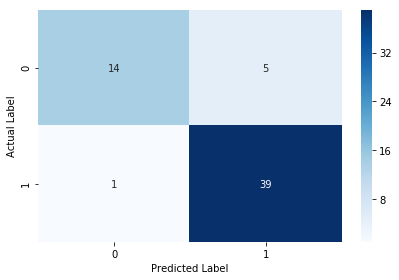

In [235]:
conf_matrix_regularized = confusion_matrix(y_test, y_pred_reg)
print(" ============= Confusion Matrix =========== ")
print(conf_matrix_regularized)

sns.heatmap(conf_matrix_regularized,cmap='Blues', annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()

In [233]:
target_labels = ['0','1']
parkinsons_tree_reg = open('parkinsons_tree_regularized.dot','w')
dot_data = tree.export_graphviz(model_dtree_reg,out_file=parkinsons_tree_reg, feature_names=list(X_train.columns), class_names=list(target_labels))
parkinsons_tree_reg.close()

# 8. Ensemble Learning - Random Forest Classifier

In [257]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=13, random_state=1)
rfcl = rfcl.fit(X_train, y_train)
y_rfcl_pred = rfcl.predict(X_test)
rfcl_score = rfcl.score(X_test, y_test)
print("Random Forest Classifier - Score : ",rfcl_score)

Random Forest Classifier - Score :  0.8983050847457628


In [263]:
tree_range = range(1,25)
tree_score = []
for num_clusters in tree_range:
    rfcl_cluster = RandomForestClassifier(n_estimators=num_clusters, criterion='entropy', random_state=1, max_depth=3, min_samples_leaf=4)
    rfcl_cluster = rfcl_cluster.fit(X_train, y_train)
    y_rfcl_cluster_predict = rfcl_cluster.predict(X_test)
    tree_score.append(rfcl_cluster.score(X_test, y_test))
    
tree_df = pd.DataFrame( { "num_clusters":tree_range, "cluster_score": tree_score } )
tree_df

,num_clusters,cluster_score
0,1,0.694915
1,2,0.762712
2,3,0.830508
3,4,0.796610
4,5,0.813559
5,6,0.830508
6,7,0.830508
7,8,0.830508
8,9,0.813559
9,10,0.796610
